In [1]:
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
from pmdarima import auto_arima
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pylab as plt

In [2]:
btcSept_df = pd.read_csv('../../Resources/BTC/BTC-USD_Historical_Sept-2021.csv',index_col='Date', parse_dates= True)
btcSept_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1191.099976,755.755981,970.403015,970.403015,5.143972e+09
2017-02-01,970.940979,1200.390015,946.690979,1179.969971,1179.969971,4.282761e+09
2017-03-01,1180.040039,1280.310059,903.713013,1071.790039,1071.790039,1.087246e+10
2017-04-01,1071.709961,1347.910034,1061.089966,1347.890015,1347.890015,9.757448e+09
2017-05-01,1348.300049,2763.709961,1348.300049,2286.409912,2286.409912,3.426186e+10


In [3]:
btcSept_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [4]:
btcSept_df = btcSept_df.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [5]:
btcSept_df.head(10)

,Close
Date,
2017-01-01,970.403015
2017-02-01,1179.969971
2017-03-01,1071.790039
2017-04-01,1347.890015
2017-05-01,2286.409912
2017-06-01,2480.840088
2017-07-01,2875.340088
2017-08-01,4703.390137
2017-09-01,4338.709961


In [6]:
btcSept_df.dtypes

Close    float64
dtype: object

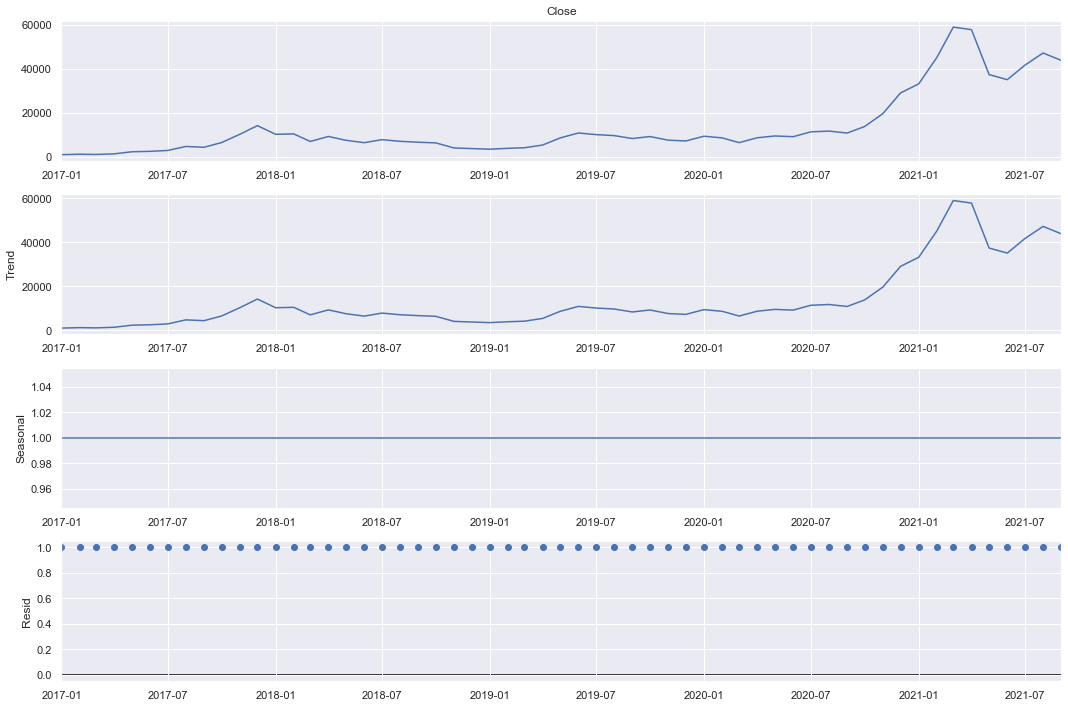

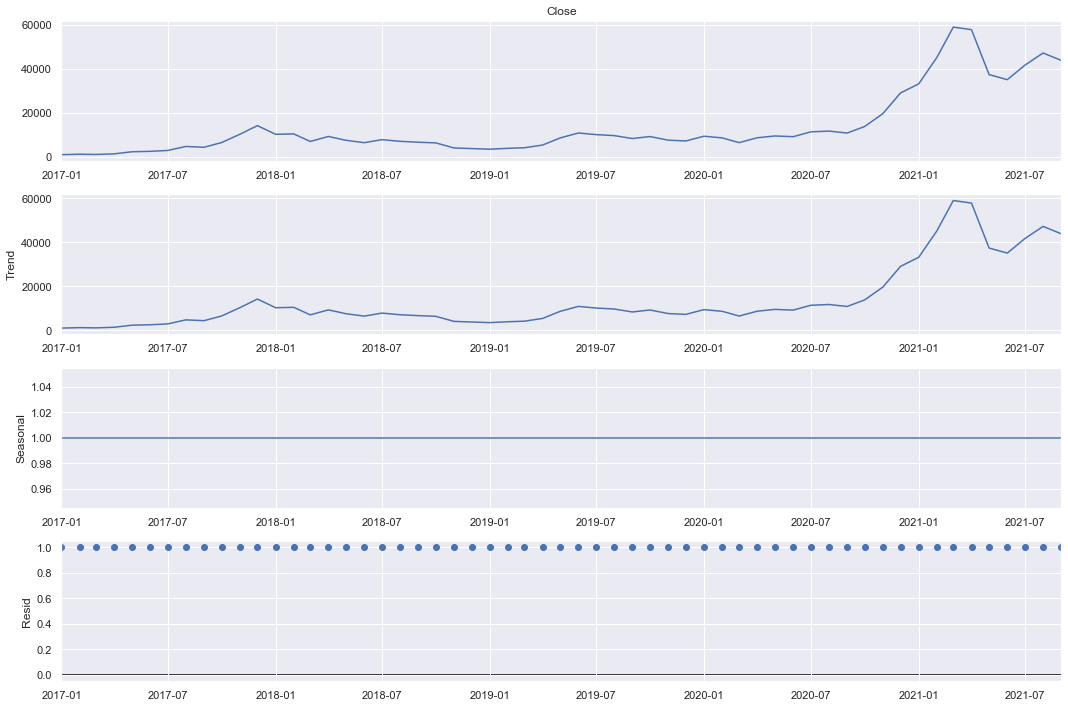

In [7]:
results = seasonal_decompose(btcSept_df['Close'],model ='multiplicative',period=1)
plt.rcParams.update({'figure.figsize': (15,10)})
results.plot()

In [8]:
#Arima
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to BTC dataset
stepwise_fit = auto_arima(btcSept_df['Close'], start_p = 0, start_q = 0,
max_p = 4, max_q = 4, m = 12,
start_P = 0, seasonal = True,
d = None, D = 1, trace = True,
error_action ='ignore', # we don't want to know if an order does not work
suppress_warnings = True, # we don't want convergence warnings
stepwise = True)# set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=883.569, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=880.368, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=873.794, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=877.538, Time=0.01 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=873.171, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=875.419, Time=0.04 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=876.070, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=876.371, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=874.402, Time=0.08 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=872.117, Time=0.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=883.693, Time=0.19 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=875.881, Time=0.11 sec
 ARIMA(0,1,2)(2,1,0)[12]             : AIC=874.104, Time=0.30 sec
 ARIMA(1,1,0)(2,1,0)[12]             

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   57
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -432.058
Date:                             Sun, 12 Dec 2021   AIC                            872.117
Time:                                     17:22:32   BIC                            879.253
Sample:                                          0   HQIC                           874.763
                                              - 57                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6329      0.108      5.871      0.000       0.422       0.844
ar.S.L12      -0.9021      0.419     -2.155      0.031      -1.723      -0.082
ar.S.L24      -0.5307      0.177     -3.005      0.003      -0.877      -0.185
sigma2      1.813e+07   1.88e-08   9.64e+14      0.000    1.81e+07    1.81e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                21.96
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               7.84   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.26e+30. Standard errors may be unstable.
"""

In [9]:
# Split data into train / test sets
train = btcSept_df.iloc[:len(btcSept_df)-12]
test = btcSept_df.iloc[len(btcSept_df)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                   45
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -282.567
Date:                            Sun, 12 Dec 2021   AIC                            575.133
Time:                                    17:22:32   BIC                            582.462
Sample:                                01-01-2017   HQIC                           577.563
                                     - 09-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0299      0.208      0.144      0.885      -0.377       0.437
ar.S.L12      -0.7988      0.640     -1.248      0.212      -2.054       0.456
ar.S.L24      -0.6856      0.477     -1.438      0.150      -1.620       0.249
ma.S.L12      -0.5712      2.024     -0.282      0.778      -4.537       3.395
sigma2      1.434e+06   1.67e+06      0.860      0.390   -1.83e+06     4.7e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 1.37
Prob(Q):                              0.69   Prob(JB):                         0.50
Heteroskedasticity (H):               1.21   Skew:                             0.38
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

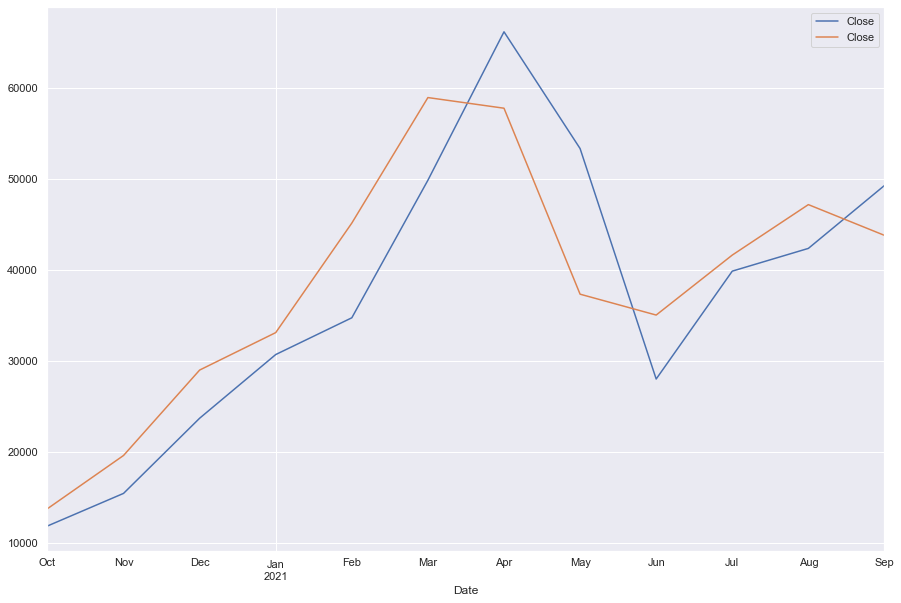

In [14]:
#Predictions of ARIMA Model agains the Test set
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels').rename("Close")

# plot predictions and actual values
predictions.plot(legend = True)
test['Close'].plot(legend = True)


In [15]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Close"], predictions)

7509.106348281403

In [16]:
# Calculate mean squared error
mean_squared_error(test["Close"], predictions)

56386678.14980007

Text(0, 0.5, 'Closing Amount (USD)')

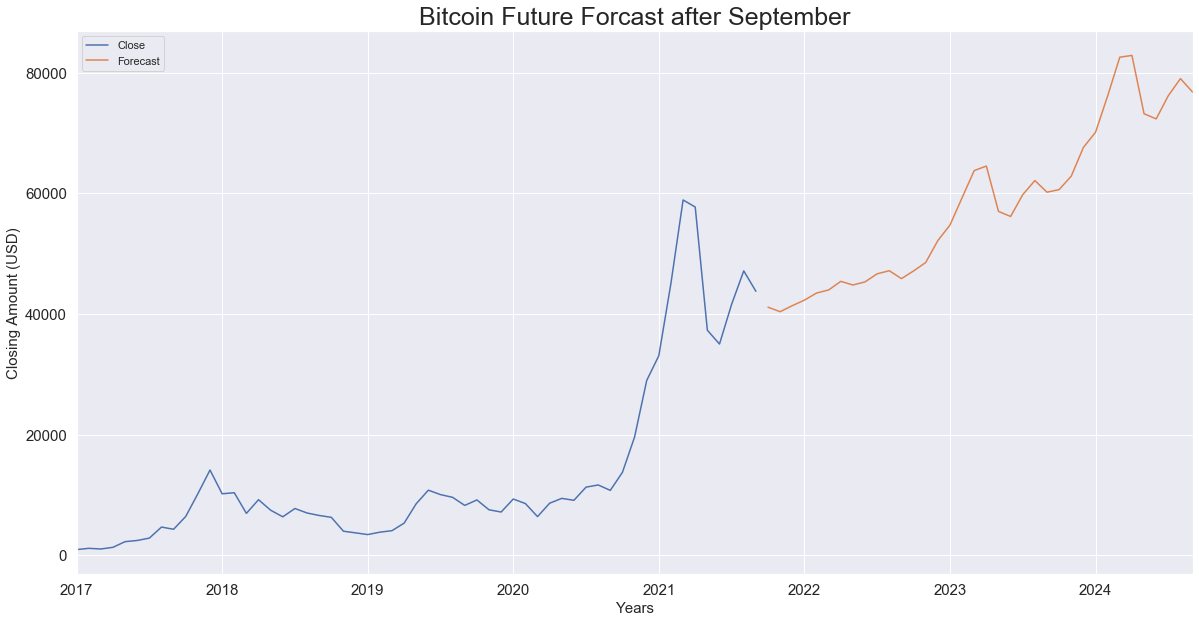

In [13]:
# Train the model on the full dataset
model = model = SARIMAX(btcSept_df['Close'],order = (0, 1, 1),seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(btcSept_df),end = (len(btcSept_df)-1) + 3 * 12,typ = 'levels').rename('Forecast')

# Plot the forecast values
btcSept_df['Close'].plot(figsize = (20, 10), legend = True, fontsize =15)
forecast.plot(legend = True)
plt.title("Bitcoin Future Forcast after September", fontsize = 25)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Closing Amount (USD)',fontsize=15)
